<a href="https://colab.research.google.com/github/tuncermerve/HighLevelProgramming2021/blob/TuncerMerve/10ex_algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt
import pandas as pd

1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [2]:
np.random.seed(1)

size = 1000
x1 = np.random.normal(0, 1, size)
x2 = x1 + np.random.normal(0, 3, size)
x3 = 2 * x1 + x2
x = np.vstack((x1, x2, x3))

def eigendecomposition(x):
    cov = np.cov(x)
    l, V = la.eig(cov)
    l = np.real_if_close(l)
    return l, V

l, V = eigendecomposition(x)

print(f'Eigenvalues: {l}')
print(f'Eigenvectors: {V}\n')

def eigendecomposition_SVD(x):
    U, S, Vt = la.svd(x)
    l_svd = S**2/(size-1)
    V_svd = U
    return l_svd, V_svd

l_svd, V_svd = eigendecomposition_SVD(x)

print(f'Eigenvalues (SVD): {l_svd}')
print(f'Eigenvectors (SVD): {V_svd}\n')

#Results are the same a part from floating point approximations.

Eigenvalues: [2.82921436e+01 2.32486881e-15 1.95180800e+00]
Eigenvectors: [[-0.10896172 -0.81649658  0.56697502]
 [-0.58543803 -0.40824829 -0.70042534]
 [-0.80336147  0.40824829  0.43352471]]

Eigenvalues (SVD): [2.83471156e+01 1.95235587e+00 3.22585156e-30]
Eigenvectors (SVD): [[-0.10907973  0.56695233 -0.81649658]
 [-0.58529223 -0.70054717 -0.40824829]
 [-0.80345169  0.43335749  0.40824829]]



In [3]:
l_abs = np.abs(l)

variability_perc_1 = l_abs[0] / l_abs.sum() * 100
print(f'Variability (%) considering only the principal component 1: {variability_perc_1}')

variability_perc_2 = l_abs[1] / l_abs.sum() * 100
print(f'Variability (%) considering only the principal component 2: {variability_perc_2}')

variability_perc_3 = l_abs[2] / l_abs.sum() * 100
print(f'Variability (%) considering only the principal component 3: {variability_perc_3}')

variability_perc_1_3 = (l_abs[0] + l_abs[2]) / l_abs.sum() * 100
print(f'Variability (%) considering only the principal component 1 and 3: {variability_perc_1_3}')

Variability (%) considering only the principal component 1: 93.54645178775263
Variability (%) considering only the principal component 2: 7.687053733454327e-15
Variability (%) considering only the principal component 3: 6.453548212247355
Variability (%) considering only the principal component 1 and 3: 99.99999999999999


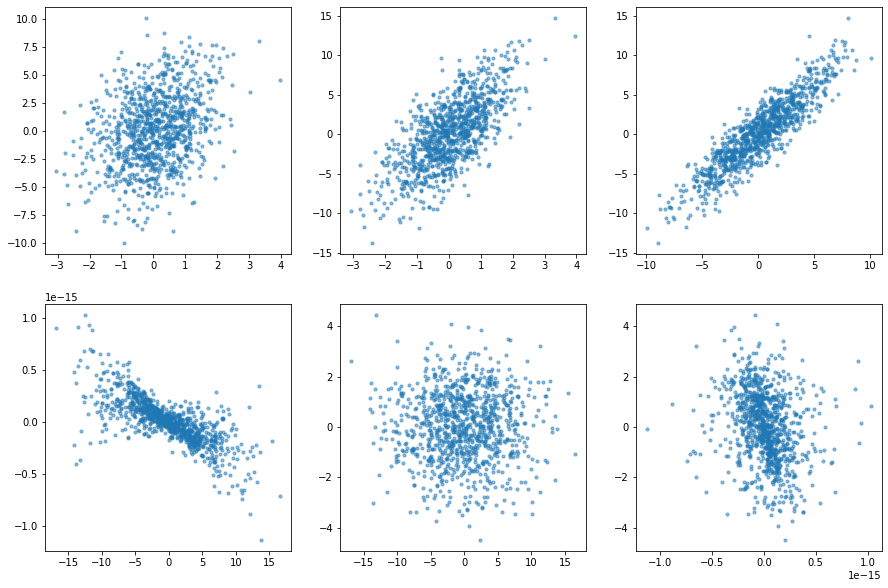

In [4]:
x2 = np.dot(V.T, x)

def compare(x, x2):
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
    dot_size = 10
    alpha = 0.5

    axs[0, 0].scatter(x[0, :], x[1, :], s=dot_size, alpha=alpha)
    axs[1, 0].scatter(x2[0, :], x2[1, :], s=dot_size, alpha=alpha)

    axs[0, 1].scatter(x[0, :], x[2, :], s=dot_size, alpha=alpha)
    axs[1, 1].scatter(x2[0, :], x2[2, :], s=dot_size, alpha=alpha)

    axs[0, 2].scatter(x[1, :], x[2, :], s=dot_size, alpha=alpha)
    axs[1, 2].scatter(x2[1, :], x2[2, :], s=dot_size, alpha=alpha)
    
compare(x, x2)

2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

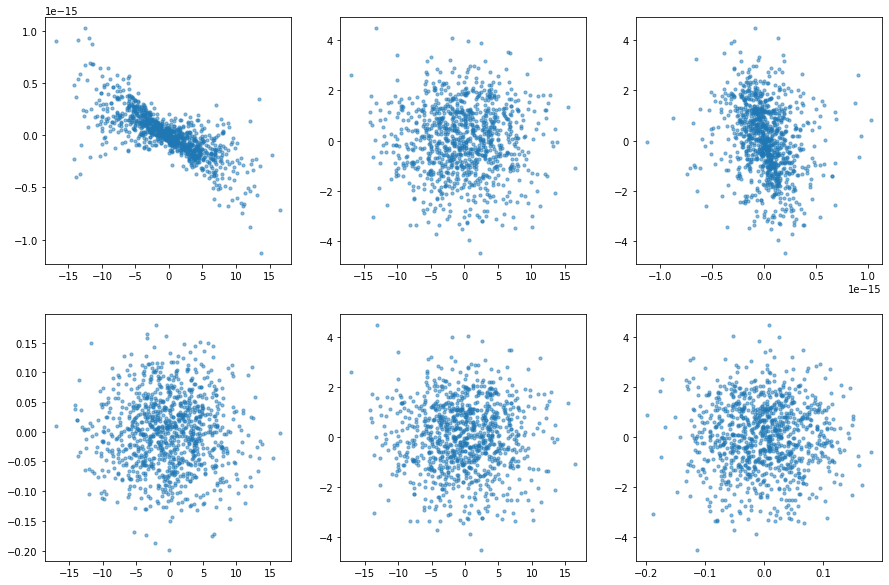

In [5]:
def pca(x):
    cov = np.cov(x)
    _, V = la.eig(cov)
    x2 = np.dot(V.T, x)
    return x2

noises = np.random.normal(loc=0, scale=1/50, size=(3, x.shape[1], 10))
x_noise = x + np.sum(noises, axis = 2)

x3 = pca(x_noise)

compare(x2, x3)

3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [6]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

--2022-01-19 17:43:58--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1477391 (1.4M) [application/x-httpd-php]
Saving to: ‘data/magic04.data’

magic04.data        100%[===================>]   1.41M  3.42MB/s    in 0.4s    

2022-01-19 17:43:59 (3.42 MB/s) - ‘data/magic04.data’ saved [1477391/1477391]

--2022-01-19 17:43:59--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5400 (5.3K) [application/x-httpd-php]
Saving to: ‘data/magic04.names’

magic04.names       100%[===================>]   5.27K  --.-K

In [9]:

file_name = "data/magic04.data"
data = pd.read_csv(file_name, nrows=1000, names=['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'category'])
print(data)
del data['category']
covMatrix = np.cov(data.T)
l, V = la.eig(covMatrix)
l = np.sort(l)[::-1] 
l = np.real_if_close(l)
Lambda = np.diag(l)
print("By selecting the first component , we retain %.2f%% of the total variability" % (100*Lambda[0,0]/Lambda.trace()))
treshold=0.9
info=0
ind=0
while info<treshold:
    info+=Lambda[ind,ind]/Lambda.trace()
    ind+=1
print("By selecting the first %d component , we retain %.2f%% of the total variability" % (ind,100*info))

      fLength    fWidth   fSize   fConc  ...  fM3Trans   fAlpha     fDist  category
0     28.7967   16.0021  2.6449  0.3918  ...   -8.2027  40.0920   81.8828         g
1     31.6036   11.7235  2.5185  0.5303  ...   -9.9574   6.3609  205.2610         g
2    162.0520  136.0310  4.0612  0.0374  ...  -45.2160  76.9600  256.7880         g
3     23.8172    9.5728  2.3385  0.6147  ...   -7.1513  10.4490  116.7370         g
4     75.1362   30.9205  3.1611  0.3168  ...   21.8393   4.6480  356.4620         g
..        ...       ...     ...     ...  ...       ...      ...       ...       ...
995   20.0489    9.2926  2.4014  0.6429  ...   10.2506  25.8830  187.8470         g
996   13.3396   10.5628  2.1917  0.7910  ...   11.9001  10.7959  182.9100         g
997   49.8521   11.4525  2.3971  0.4529  ...   -8.6905   6.0457  183.4950         g
998   29.2688   14.2779  2.5723  0.4016  ...   -8.2073  47.5590  102.7790         g
999   21.9470   20.3281  2.4864  0.4078  ...   14.8348  40.4341  137.8100   